## Colab 환경에서 자연어처리(2)

### [학습 내용]
### 01 사전 작업
### 02 영문 텍스트 데이터 시각화
### 03 (한글) 영화 댓글 시각화

### 01 사전 작업 
 * 한글 폰트 적용, konlpy 설치

In [1]:
### 나눔 고딕 설치
!apt-get update -qq   # 설치를 업데이트 
!apt-get install fonts-nanum* -qq  # 설치한다. fonts-nanum* 

Selecting previously unselected package fonts-nanum.
(Reading database ... 155514 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [2]:
import matplotlib.font_manager as fm # 폰트 관련 용도
import matplotlib.pyplot as plt      # 그래프 그리는 용도

In [3]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf' # 나눔고딕 폰트 설치 위치
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

# 우선 fm._rebuild() 를 해주고 # 폰트 매니저 재빌드가 필요하다.
fm._rebuild()

NanumGothic Eco


### 런타임 재기동 후, 다시 시작

In [1]:
%matplotlib inline
import matplotlib as mpl # 기본 설정 만지는 용도
import matplotlib.pyplot as plt # 그래프 그리는 용도
import matplotlib.font_manager as fm # 폰트 관련 용도
import numpy as np

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf' # 나눔고딕 폰트 설치 위치
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

## 음수 표시되도록 설정
mpl.rcParams['axes.unicode_minus'] = False 

NanumGothic Eco


Text(0.5, 1.0, '시간별 가격 추이')

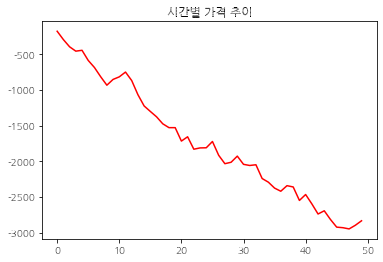

In [2]:
# 데이터 준비
data = np.random.randint(-200, 100, 50).cumsum()

# 그래프를 그려 한글 확인
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이')

### 웹 환경이 아닌 개인 컴퓨터에서의 한글 폰트 설정
```
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 위치 지정
if platform.system() == "Windows":  # 사용 OS가 Windows의 경우
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":   # 사용 OS가 Mac인 경우
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
```

### konlpy 설치

In [3]:
pip install konlpy

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 448 kB 47.1 MB/s 


In [4]:
import nltk
from konlpy.tag import Kkma      ### 꼬꼬마
from konlpy.tag import Hannanum  ### 한나눔

### wordcloud와 이미지 표시
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

### 02 텍스트 데이터 시각화
 * open("불러올 파일명").read() : 파일 내용을 불러온다.

In [6]:
### 데이터 읽기
text = open("alice.txt").read()
text

'\ufeffProject Gutenberg\'s Alice\'s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice\'s Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nPosting Date: June 25, 2008 [EBook #11]\nRelease Date: March, 1994\n[Last updated: December 20, 2011]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE\'S ADVENTURES IN WONDERLAND ***\n\n\n\n\n\n\n\n\n\n\nALICE\'S ADVENTURES IN WONDERLAND\n\nLewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, \'and w

In [7]:
### wordcloud의 불용어 단어 확인 
print( type(STOPWORDS) )
print(len(STOPWORDS), STOPWORDS)

<class 'set'>
190 {'since', 'same', 'myself', 'our', 'r', "that's", 'them', 'these', 'as', "couldn't", "haven't", "she's", 'her', 'had', 'no', 'having', 'http', "aren't", 'which', 'not', "there's", 'what', "they're", 'this', "i'll", "doesn't", 'also', 'they', 'it', "here's", 'under', 'that', 'than', 'are', 'after', 'being', 'further', 'again', "i'd", 'otherwise', 'through', 'too', 'once', 'com', 'get', "he'll", 'own', "you'd", 'while', "it's", 'hers', 'any', "wouldn't", 'my', "don't", "why's", 'or', 'when', 'into', 'those', 'below', 'very', 'were', 'herself', 'some', "hadn't", "how's", 'an', 'is', 'about', "we'd", "hasn't", "when's", "we'll", 'all', 'its', "we're", 'between', 'ours', "can't", 'me', 'k', 'doing', 'ourselves', 'by', 'himself', 'of', 'but', 'such', "wasn't", 'their', 'where', 'shall', 'cannot', 'should', 'if', 'ever', 'a', "you've", 'at', "they've", 'both', 'we', "he'd", 'did', 'yourself', 'because', 'from', 'be', 'off', 'out', 'would', 'most', 'up', 'www', 'for', 'how', 

### 파이썬 자료형 집합에 대해 알아보기
 * 중복을 없앤다.

In [8]:
## 집합 확인
s2 = set([1,2,3,4,5,1,2])
s2

{1, 2, 3, 4, 5}

In [18]:
### 불용어 단어 추가
x_words = set(STOPWORDS)
x_words.add("said")
print( len(x_words), x_words)  # 불용어 단어 개수 및 리스트 확인

191 {'since', 'same', 'myself', 'our', 'r', "that's", 'them', 'these', 'as', "couldn't", "haven't", "she's", 'her', 'had', 'no', 'having', 'http', "aren't", 'which', 'not', "there's", 'what', "they're", 'this', "i'll", "doesn't", 'also', 'they', 'it', "here's", 'under', 'that', 'than', 'are', 'after', 'being', 'further', 'again', "i'd", 'otherwise', 'through', 'too', 'once', 'com', 'get', "he'll", 'own', "you'd", 'while', "it's", 'hers', 'any', "wouldn't", 'my', "don't", "why's", 'or', 'when', 'into', 'those', 'below', 'very', 'were', 'herself', 'some', "hadn't", "how's", 'an', 'is', 'about', "we'd", "hasn't", "when's", "we'll", 'all', 'its', "we're", 'between', 'ours', "can't", 'me', 'k', 'doing', 'ourselves', 'said', 'by', 'himself', 'of', 'but', 'such', "wasn't", 'their', 'where', 'shall', 'cannot', 'should', 'if', 'ever', 'a', "you've", 'at', "they've", 'both', 'we', "he'd", 'did', 'yourself', 'because', 'from', 'be', 'off', 'out', 'would', 'most', 'up', 'www', 'for', 'how', 'there

### 앨리스 이미지 확인

* Image.open() : 주어진 이미지 파일을 불러온다.
* np.array() : 배열을 만든다

In [10]:
# 이미지를 불러와 numpy 자료형 형으로 변경.
alice_mask = np.array(Image.open("alice_color.png"))
alice_mask[0]   # 이미지 배열화된 내용 하나의 정보 확인

array([[255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       ...,
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255]], dtype=uint8)

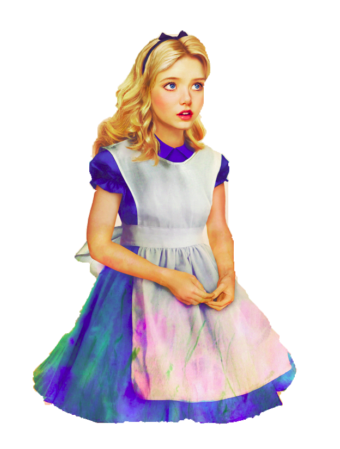

In [11]:
plt.figure(figsize=(15,8))  # 크기
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')    # x, y축 없음.
plt.show()

In [25]:
### 워드 클라우드 표현을 위한 데이터 생성
wc = WordCloud( background_color='white',    # 배경색
                max_words=2000,              # 최대 표시 단어
                mask=alice_mask,             # 마스크 이미지 정보
                contour_width=3,             # 외곽선 
                contour_color="steelblue" )  # 외곽선 색
wc.generate(text)

* interpolation 참조 : https://matplotlib.org/3.2.1/gallery/images_contours_and_fields/interpolation_methods.html

In [26]:
# 단어 리스트 확인
word_list = list( wc.words_.keys() )
print( len(word_list) )
word_list[0:10]

2000


['Alice',
 'said',
 'said Alice',
 'little',
 'one',
 'know',
 'went',
 'thing',
 'time',
 'Queen']

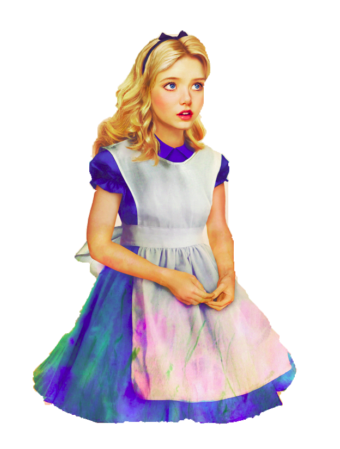

In [27]:
plt.figure(figsize=(15,8))  # 크기
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

### 위에서 생성한 워드 클라우드 객체 wc 데이터를 이용하여 그래프 표시

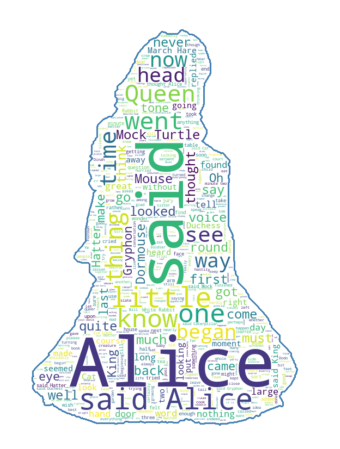

In [28]:
plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation="bilinear") 
plt.axis("off")
plt.show()

In [29]:
# 불용어 처리
print(len(word_list))
for word in word_list:
  if word in x_words:
    print(word)
    del wc.words_[word]
len(wc.words_)

2000
said


1999

In [34]:
wc.words_

{'Alice': 1.0,
 'said Alice': 0.5061728395061729,
 'little': 0.4444444444444444,
 'one': 0.39094650205761317,
 'know': 0.37037037037037035,
 'went': 0.34156378600823045,
 'thing': 0.3292181069958848,
 'time': 0.3168724279835391,
 'Queen': 0.31275720164609055,
 'see': 0.2757201646090535,
 'now': 0.24691358024691357,
 'began': 0.23868312757201646,
 'way': 0.2345679012345679,
 'head': 0.23045267489711935,
 'Mock Turtle': 0.23045267489711935,
 'say': 0.22633744855967078,
 'well': 0.2222222222222222,
 'think': 0.21810699588477367,
 'quite': 0.2139917695473251,
 'much': 0.20987654320987653,
 'first': 0.20987654320987653,
 'thought': 0.205761316872428,
 'go': 0.205761316872428,
 'come': 0.19753086419753085,
 'never': 0.1934156378600823,
 'voice': 0.18930041152263374,
 'looked': 0.18518518518518517,
 'got': 0.18518518518518517,
 'must': 0.18106995884773663,
 'Mouse': 0.18106995884773663,
 'round': 0.16872427983539096,
 'back': 0.1646090534979424,
 'Dormouse': 0.1646090534979424,
 'make': 0.156

(-0.5, 599.5, 799.5, -0.5)

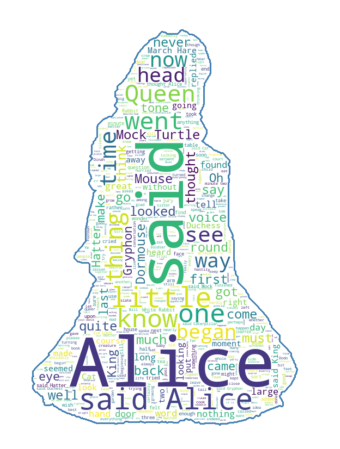

In [35]:
plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation="bilinear") 
plt.axis("off")

### 03 영화 댓글 시각화

*  분노의 질주 - 댓글 분석

In [36]:
doc_ko = open("15_TheExtreme_utf8.txt").read()
doc_ko[1:1000]

'"x"\n"1" " 분노의 질주 시리즈중에서 제일 별루"\n"2" " 스케일 큰 시끄러운 액션이 난무하는데도 이렇게까지 지루할수 있다니....."\n"3" " 시~원 하게 잘 본 영화. 다음 시리즈에서는 여자 주인공의 비중이 더 높아졌으면 하는 바램!"\n"4" " 반지닦기, 자살닦이, 고무닦이, 정의닦이...로 이어지는 한심한 DC 시리즈 \n레지던트 이블 시리즈 \n그리고 이 영화 분노의 질주 시리즈 \n공통점은 시리즈가 거듭될수록 돈은 많이 들지만 재미는 없어지고 \nCG는 떡질되지만 실감나는 장면은 더 없어지도 뻔히 가짜라는게 드러나는 영화들 \n그러나\n아무리 엉터리로 만들고, 자국에서 망해도 \n미국 블록버스터라면 맹목적으로 보는 중국애들 땜에 \n아무리 쓰레기 영화라도 본전 건지는 것은 물론 상당히 많은 돈을 버니... \n이런 쓰레기들이 매년 양산된다. \n물론, 중국애들도 할말은 있을 거다 \n공산당이 검열하는 자국영화보다는 낫다고... \n하지만 우리들은 다른 전세계의 재미있는 영화를 볼 선택의 자유가 있쟎아! \n왜 이런 쓰레기 영화를 보는 거지?"\n"5" " "\n"6" " 그냥 액션만 보면 멋진데\n스토리는 주인공이 전여친한테 싸지른\n애새끼 구하러 간다며 아빠행세하면서\n그 덕분에 지동료들 다 버리고 미쳐 날뛰는 내용"\n"7" " "\n"8" " 아래는 다들 평점 알바들인가부네.. 이런 개 쓰레기 영화가 평점이 이리 높다니"\n"9" " "\n"10" " "\n"11" " "\n"12" " "\n"13" " "\n"14" " "\n"15" " 스케일은 점점 더 커지지만, 액션은 멍청할정도로 어이가없음 과유불급"\n"16" " 이 시리즈로 이렇게 길게 간다는게 신기.. 새로울 건 없지만 달리는 걸 좋아하시는 분이라면 "\n"17" " "\n"18" " "\n"19" " "\n"20" " 대머리들은 TV물로 찍고,\n감독은 CG실에서 이어붙히고."\n"21" " "\n"22" " "\n"23" " "\n"24" " "\n"25" " 

In [37]:
# OKT 클래스를 이용한 명사확인
from konlpy.tag import Okt       ### Okt

t = Okt()
doc_nouns = t.nouns(doc_ko)
doc_nouns

['분노',
 '질주',
 '시리즈',
 '제일',
 '별루',
 '스케일',
 '액션',
 '난무',
 '시',
 '원',
 '영화',
 '다음',
 '시리즈',
 '여자',
 '주인공',
 '비중',
 '더',
 '바램',
 '반지',
 '자살',
 '고무',
 '정의',
 '로',
 '시리즈',
 '레지던트',
 '이블',
 '시리즈',
 '이',
 '영화',
 '분노',
 '질주',
 '시리즈',
 '공통점',
 '시리즈',
 '거듭',
 '돈',
 '재미',
 '떡질',
 '실감',
 '나',
 '장면',
 '더',
 '가짜',
 '게',
 '영화',
 '엉터리',
 '자국',
 '미국',
 '블록버스터',
 '라면',
 '맹목',
 '중국',
 '애',
 '땜',
 '쓰레기',
 '영화',
 '본전',
 '것',
 '돈',
 '버니',
 '쓰레기',
 '매년',
 '양산',
 '중국',
 '애',
 '거',
 '공산당',
 '검열',
 '자국',
 '영화',
 '낫다',
 '우리',
 '다른',
 '전세계',
 '영화',
 '볼',
 '선택',
 '자유',
 '있쟎',
 '왜',
 '쓰레기',
 '영화',
 '거지',
 '그냥',
 '액션',
 '스토리',
 '주인공',
 '전여친',
 '애',
 '새끼',
 '구',
 '간다',
 '아빠',
 '행세',
 '그',
 '덕분',
 '동료',
 '내용',
 '아래',
 '평점',
 '알바',
 '개',
 '쓰레기',
 '영화',
 '평점',
 '스케일',
 '점점',
 '더',
 '액션',
 '정도',
 '어이',
 '과유',
 '불급',
 '이',
 '시리즈',
 '신기',
 '건',
 '걸',
 '대머리',
 '물',
 '감독',
 '실',
 '이제',
 '제목',
 '분노',
 '질주',
 '해도',
 '전형',
 '헐리우드',
 '액션',
 '물',
 '생각',
 '영화',
 '노잼',
 '노',
 '볼거리',
 '평점',
 '시리즈',
 '편',
 '질질',
 '루즈',
 '분노',
 '질주'

* nltk.Text
  * 빈도수 분석
  * 빈도수를 이용한 그래프 그리기
  * 기타

In [38]:
# nltk.Text()를 이용하여 nltk가 가지는 많은 기능을 사용 가능함.
ko = nltk.Text(doc_nouns, name="분노의 질주")
print(type(ko))
print(len(ko.tokens))

<class 'nltk.text.Text'>
4286


In [39]:
### 단어들의 사용 횟수 확인 - 빈도 분석
list( ko.vocab() )[0:10]

['분노', '질주', '시리즈', '제일', '별루', '스케일', '액션', '난무', '시', '원']

In [41]:
most_fre = ko.vocab().most_common(30)
most_fre

[('영화', 157),
 ('액션', 149),
 ('시리즈', 70),
 ('분노', 62),
 ('스토리', 57),
 ('질주', 55),
 ('최고', 44),
 ('자동차', 40),
 ('생각', 37),
 ('편', 37),
 ('더', 36),
 ('그냥', 33),
 ('역시', 32),
 ('좀', 31),
 ('폴', 31),
 ('워커', 30),
 ('그', 28),
 ('장면', 26),
 ('이', 25),
 ('것', 25),
 ('가족', 24),
 ('점', 24),
 ('기대', 24),
 ('재미', 23),
 ('내용', 23),
 ('볼', 22),
 ('시간', 22),
 ('보고', 22),
 ('스케일', 21),
 ('진짜', 21)]

In [42]:
### 중복된 단어를 제거한 개수를 확인
print(len(set(ko.tokens)))

1381


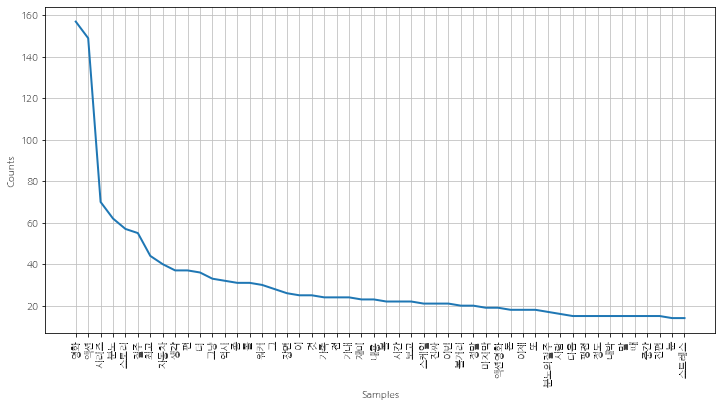

In [43]:
plt.figure(figsize=(12, 6))
ko.plot(50)
plt.show()

````

'분노', '영화', '액션', '시리즈', '더',
              '편', '좀', '그냥', '그', '이', '것',
              '점', '볼', '보고', '이제', '정말', '이번'
              '또', '다음', '평점', '때', '말', '눈',
              '시', '원', '더', '로','이', '나', '게',
              '에', '땜', '것', '거'

불용어 = ['영화', '시리즈', '분노', '이번', '말', '때', '눈', '다음', '평점', 
              '정말', '그', '이','것','좀','폴','워커', '볼', '점', '분노의질주', '완전',
              '듯', '또','돈', '편', '차', '나']


['분노', '영화', '더', '편', '좀', '폴',
              '그', '이', '것', '점', '볼', '돈', '또',
              '말', '때', '눈', '뭐', '중', '씬', '애', '나']

['분노','질주','영화', '감독','시리즈','편','액션','질주']


```

In [44]:
### 한글에서는 따로 불용어 사전이 없어, 따로 만들거나 또는 파일로 부터 불러올 수 있다.
stop_words = ['분노', '영화', '액션', '시리즈', '더', '편', '좀', '그냥', '그', '이', '것', 
              '점', '볼', '보고', '이제', '정말', '이번' '또', '다음', '평점', '때', '말', 
              '눈', '시', '원', '더', '로','이', '나', '게', '에', '땜', '것', '거',
              '영화', '시리즈', '분노', '이번', '말', '때', '눈', '다음', '평점', '정말', 
              '그', '이','것','좀','폴','워커', '볼', '점', '분노의질주', '완전', '듯', 
              '또','돈', '편', '차', '나', '더', '편', '좀', '폴', '그', '이', '것', '점', 
              '볼', '돈', '또', '말', '때', '눈', '뭐', '중', '씬', '애', '나',
              ]

new_ko = [ ]
for one_word in ko:
  if one_word not in stop_words:
    new_ko.append(one_word)

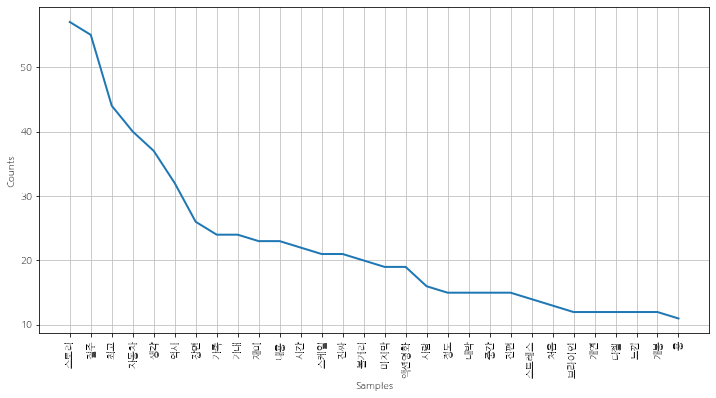

In [46]:
### nltk Text 객체 만들기
new_ko = nltk.Text(new_ko, name="분노의 질주2")
plt.figure(figsize=(12,6))
new_ko.plot(30)
plt.show()

### 텍스트의 단어어 분포 확인 (dispersion_plot)

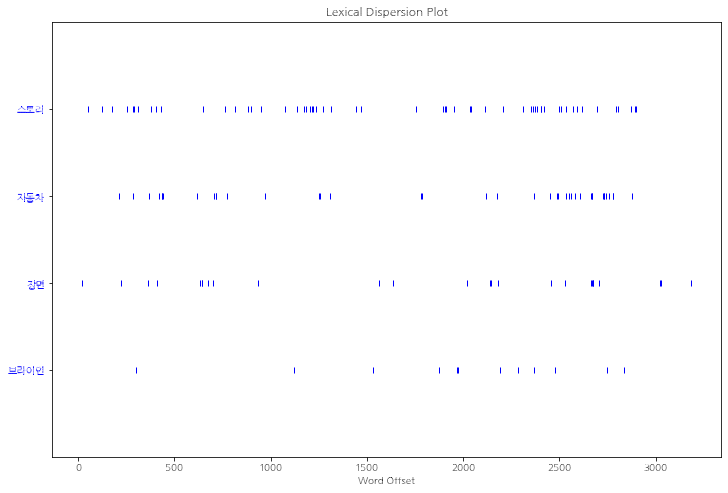

In [49]:
plt.figure(figsize=(12,8))
new_ko.dispersion_plot(['스토리', '자동차', '장면', '브라이언'])

In [50]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [51]:
Car_mask = np.array(Image.open("Draw_car1.png"))

In [53]:
data = new_ko.vocab().most_common(250)
data

[('스토리', 57),
 ('질주', 55),
 ('최고', 44),
 ('자동차', 40),
 ('생각', 37),
 ('역시', 32),
 ('장면', 26),
 ('가족', 24),
 ('기대', 24),
 ('재미', 23),
 ('내용', 23),
 ('시간', 22),
 ('스케일', 21),
 ('진짜', 21),
 ('볼거리', 20),
 ('마지막', 19),
 ('액션영화', 19),
 ('사람', 16),
 ('정도', 15),
 ('대박', 15),
 ('중간', 15),
 ('전편', 15),
 ('스트레스', 14),
 ('처음', 13),
 ('브라이언', 12),
 ('개연', 12),
 ('디젤', 12),
 ('느낌', 12),
 ('개봉', 12),
 ('용', 11),
 ('보기', 11),
 ('빈', 11),
 ('하나', 11),
 ('샤를', 11),
 ('배우', 10),
 ('제이슨', 10),
 ('아기', 10),
 ('굿', 10),
 ('끝', 10),
 ('조금', 10),
 ('초반', 10),
 ('별로', 10),
 ('리즈', 10),
 ('대사', 9),
 ('수', 9),
 ('편이', 9),
 ('저', 9),
 ('임', 9),
 ('예고편', 9),
 ('좀비', 9),
 ('꼭', 9),
 ('점점', 8),
 ('걸', 8),
 ('돔', 8),
 ('스타', 8),
 ('킬링타임', 8),
 ('아주', 8),
 ('후', 8),
 ('만', 8),
 ('위해', 8),
 ('잠수함', 8),
 ('수준', 8),
 ('이상', 8),
 ('테론', 8),
 ('영화관', 8),
 ('쓰레기', 7),
 ('왜', 7),
 ('감독', 7),
 ('모두', 7),
 ('연출', 7),
 ('전개', 7),
 ('아들', 7),
 ('다시', 7),
 ('실망', 7),
 ('이름', 7),
 ('설정', 7),
 ('가장', 7),
 ('스타뎀', 7),
 ('스릴', 7),
 ('

In [54]:
### 워드 클라우드 표현을 위한 데이터 생성
### 약간의 시간이 필요.
wc = WordCloud(background_color='white',    # 배경색
               max_words=200,               # 최대 표시 단어
               mask=Car_mask,               # 마스크 이미지 정보
               contour_width=3,             # 외곽선
               contour_color="steelblue",   # 외곽선 색
               font_path=path)
wc.generate_from_frequencies(dict(data))

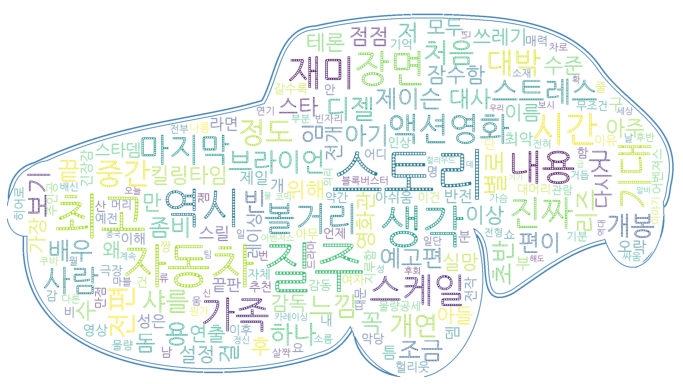

In [55]:
plt.figure(figsize=(12,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

### 이력

|No|날짜|내용|ver|
|:------|:---|:---|:---|
|01|21/09/30| 내용 업데이트|1.0|
